# Unsupervised classification | K-means

In the unsupervised classification no labels are given to the learning algorithm, leaving it on its own to find structure in its input.

In [1]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt

**Define directories**

 
 - <b>raser_path</b>: path of the raster image to be masked
  
 - <b>output_path</b>: output path to save the mask image

In [2]:
raster_path = 'data/raster_image.tif'
output_path = 'data/raster_kmeans.tif'

Read in a raster image. Afterwars initialize a `numpy.ndarray` to save the data from <i>img_ds</i> and process it.

In [3]:
img_ds = gdal.Open(raster_path, gdal.GA_ReadOnly)

img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount), 
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()

We have to flatten <i>img</i> to make the classification.

In [4]:
new_shape = (img.shape[0] * img.shape[1], img.shape[2])
X = img[:, :, :13].reshape(new_shape)

### KMeans algorithm
Applies the algorithm with the number of clusters chosen

In [5]:
%%time
n_clusters=10

k_means = cluster.KMeans(n_clusters)
k_means.fit(X)
X_cluster = k_means.labels_ # make labels 

X_cluster = X_cluster.reshape(img[:, :, 0].shape) # reshape to raster 

CPU times: user 2min 5s, sys: 33.8 s, total: 2min 39s
Wall time: 1min 4s


**Show** classification

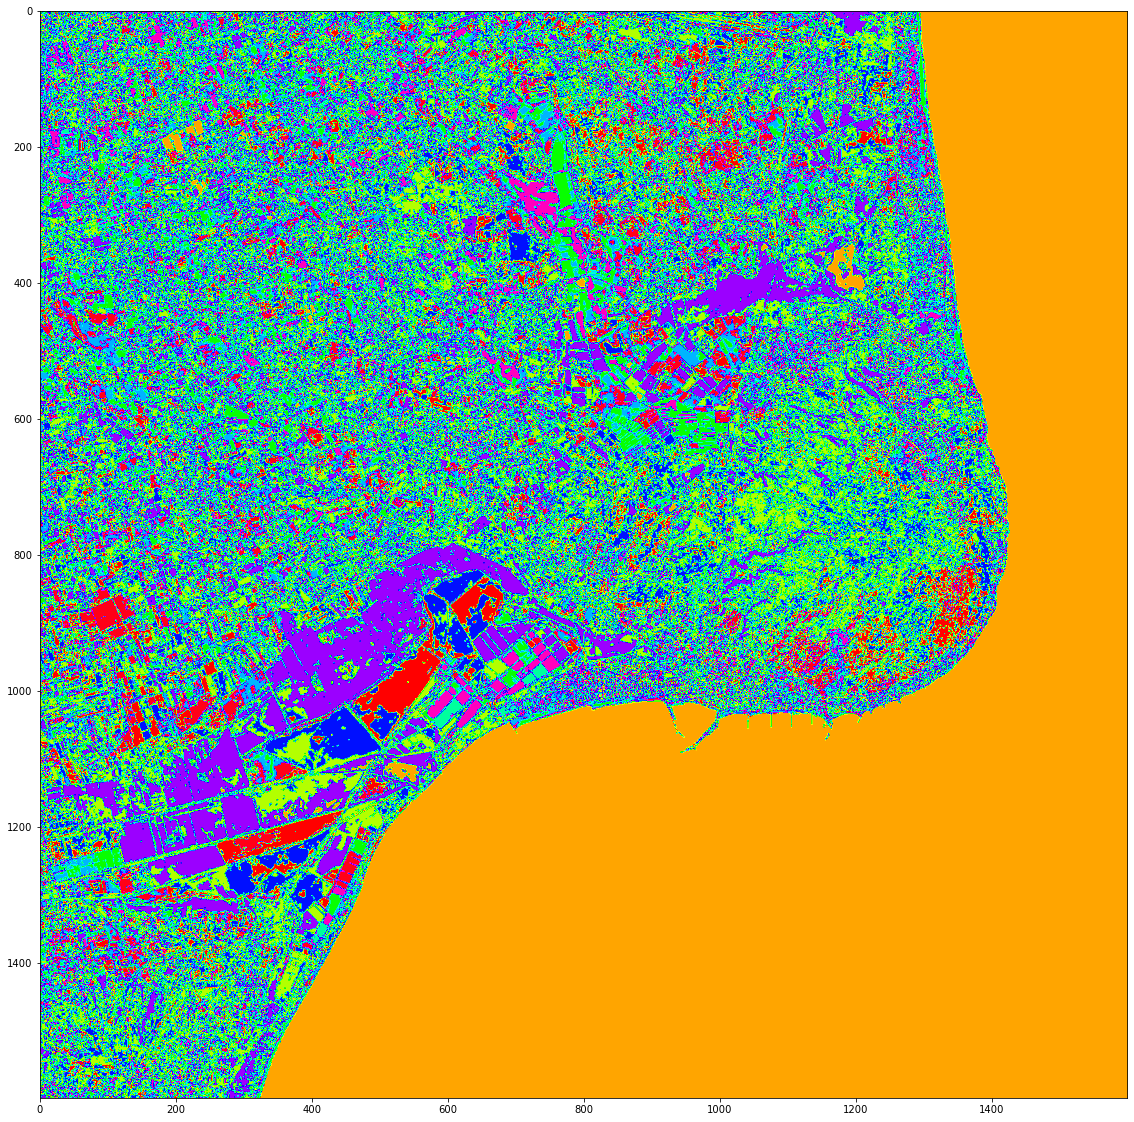

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")
plt.show()

The metadata of raster_path is read and then applied for **saving the classified image**.

In [8]:
ds = gdal.Open(raster_path)
band = ds.GetRasterBand(2)
arr = band.ReadAsArray()
[cols, rows] = arr.shape

driver = gdal.GetDriverByName("GTiff")
outDataRaster = driver.Create(output_path, rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(ds.GetGeoTransform()) # sets same geotransform as input
outDataRaster.SetProjection(ds.GetProjection()) # sets same projection as input

outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

0